In [1]:
import pandas as pd
delivery=pd.read_csv('deliveries.csv')
order_items=pd.read_csv('order_items.csv')
orders=pd.read_csv('orders.csv')
products=pd.read_csv('products.csv')


In [2]:
products

,item_id,category,Item,Size,Price
0,p_001,Veg,Margherita,Regular,109
1,p_002,Veg,Margherita,Medium,245
2,p_003,Veg,Margherita,Large,455
3,p_004,Veg,Double Cheese Margherita,Regular,215
4,p_005,Veg,Double Cheese Margherita,Medium,385
5,p_006,Veg,Double Cheese Margherita,Large,619
6,p_007,Veg,Farm House,Regular,265
7,p_008,Veg,Farm House,Medium,469
8,p_009,Veg,Farm House,Large,705
9,p_010,Veg,Deluxe Veggie,Regular,219


In [3]:
orders

,order_id,order_placed_at
0,321230114,2020-12-11 00:01:29
1,321230115,2020-12-11 00:36:02
2,321230116,2020-12-11 00:55:01
3,321230117,2020-12-11 01:05:27
4,321230118,2020-12-11 01:14:20
...,...,...
454331,321684445,2024-01-31 23:27:51
454332,321684446,2024-01-31 23:40:14
454333,321684447,2024-01-31 23:36:08
454334,321684448,2024-01-31 23:58:05


In [4]:
order_items

,order_id,items_ordered
0,321230114,"['p_025', 'p_032', 'p_037']"
1,321230115,"['p_017', 'p_012']"
2,321230116,"['p_027', 'p_037']"
3,321230117,"['p_004', 'p_029']"
4,321230118,"['p_017', 'p_037']"
...,...,...
454331,321684445,"['p_002', 'p_006', 'p_037']"
454332,321684446,"['p_015', 'p_013']"
454333,321684447,"['p_009', 'p_016']"
454334,321684448,"['p_007', 'p_003', 'p_037']"


In [5]:
delivery

,order_id,time_stamp,status
0,321230114,2020-12-11 00:01:29.000000000,Pending
1,321230114,2020-12-11 00:06:29.000000000,Out For Delivery
2,321230114,2020-12-11 00:19:13.299151076,Delivered
3,321230115,2020-12-11 00:36:02.000000000,Pending
4,321230115,2020-12-11 00:41:02.000000000,Out For Delivery
...,...,...,...
1363003,321684446,2024-01-31 23:58:08.494812502,Delivered
1363004,321684449,2024-02-01 00:00:46.000000000,Out For Delivery
1363005,321684448,2024-02-01 00:03:05.000000000,Out For Delivery
1363006,321684449,2024-02-01 00:14:56.997433391,Delivered


In [15]:
import pandas as pd

# Load the datasets
delivery = pd.read_csv('deliveries.csv')

# Convert the 'time_stamp' column to datetime
delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])

# Filter the records for 'Out For Delivery' and 'Delivered' statuses
out_for_delivery = delivery[delivery['status'] == 'Out For Delivery']
delivered = delivery[delivery['status'] == 'Delivered']

# Merge the two dataframes on 'order_id'
merged = pd.merge(out_for_delivery[['order_id', 'time_stamp']], 
                  delivered[['order_id', 'time_stamp']], 
                  on='order_id', 
                  suffixes=('_out_for_delivery', '_delivered'))

# Calculate the delivery duration in minutes
merged['delivery_duration'] = (merged['time_stamp_delivered'] - merged['time_stamp_out_for_delivery']).dt.total_seconds() / 60

# Calculate the average delivery time, rounded to 2 decimal places
average_delivery_time = round(merged['delivery_duration'].mean(), 2)

# Output the result
print(f"Average Delivery Time: {average_delivery_time} minutes")


Average Delivery Time: 15.65 minutes


In [11]:
products.columns

Index(['item_id', 'category', 'Item', 'Size', 'Price'], dtype='object')

In [12]:
orders.columns

Index(['order_id', 'order_placed_at'], dtype='object')

In [13]:
order_items.columns

Index(['order_id', 'items_ordered'], dtype='object')

In [14]:
delivery.columns

Index(['order_id', 'time_stamp', 'status'], dtype='object')

In [16]:
import pandas as pd

# Load the datasets
delivery = pd.read_csv('deliveries.csv')

# Convert the 'time_stamp' column to datetime
delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])

# Filter the records for 'Out For Delivery' and 'Delivered' statuses
out_for_delivery = delivery[delivery['status'] == 'Out For Delivery']
delivered = delivery[delivery['status'] == 'Delivered']

# Merge the two dataframes on 'order_id'
merged = pd.merge(out_for_delivery[['order_id', 'time_stamp']], 
                  delivered[['order_id', 'time_stamp']], 
                  on='order_id', 
                  suffixes=('_out_for_delivery', '_delivered'))

# Calculate the delivery duration in minutes
merged['delivery_duration'] = (merged['time_stamp_delivered'] - merged['time_stamp_out_for_delivery']).dt.total_seconds() / 60

# Calculate the 99th percentile delivery time
percentile_99_delivery_time = merged['delivery_duration'].quantile(0.99)

# Output the result, rounded to 2 decimal places
print(f"99th Percentile Delivery Time: {round(percentile_99_delivery_time, 2)} minutes")


99th Percentile Delivery Time: 25.9 minutes


In [18]:
import pandas as pd

# Load the datasets
delivery = pd.read_csv('deliveries.csv')

# Convert the 'time_stamp' column to datetime
delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])

# Filter the records for 'Out For Delivery' and 'Delivered' statuses
out_for_delivery = delivery[delivery['status'] == 'Out For Delivery']
delivered = delivery[delivery['status'] == 'Delivered']

# Merge the two dataframes on 'order_id'
merged = pd.merge(out_for_delivery[['order_id', 'time_stamp']], 
                  delivered[['order_id', 'time_stamp']], 
                  on='order_id', 
                  suffixes=('_out_for_delivery', '_delivered'))

# Calculate the delivery duration in minutes
merged['delivery_duration'] = (merged['time_stamp_delivered'] - merged['time_stamp_out_for_delivery']).dt.total_seconds() / 60

# Find the order ID with the maximum delivery time
max_delivery_time_row = merged.loc[merged['delivery_duration'].idxmax()]

max_order_id = max_delivery_time_row['order_id']
max_delivery_time = max_delivery_time_row['delivery_duration']

# Output the result
print(f"Order ID with Maximum Delivery Time: {max_order_id}, Delivery Time: {round(max_delivery_time, 2)} minutes")


Order ID with Maximum Delivery Time: 321629049, Delivery Time: 57.91 minutes


In [19]:
import pandas as pd

# Load the datasets
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')

# Convert 'order_placed_at' to datetime format
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])

# Define the date range
start_date = '2024-01-01'
end_date = '2024-01-31'

# Filter orders within the date range
filtered_orders = orders[(orders['order_placed_at'] >= start_date) & (orders['order_placed_at'] <= end_date)]

# Count the number of orders
number_of_orders = len(filtered_orders)

# Output the result
print(f"Number of pizzas ordered between {start_date} and {end_date}: {number_of_orders}")


Number of pizzas ordered between 2024-01-01 and 2024-01-31: 11894


In [20]:
import pandas as pd

# Load the datasets
delivery = pd.read_csv('deliveries.csv')
orders = pd.read_csv('orders.csv')

# Convert 'time_stamp' and 'order_placed_at' to datetime format
delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])

# Define the date range
start_date = '2024-01-01'
end_date = '2024-01-31'

# Filter delivery records for the specified date range
filtered_delivery = delivery[(delivery['time_stamp'] >= start_date) & (delivery['time_stamp'] <= end_date)]

# Filter orders placed within the specified date range
filtered_orders = orders[(orders['order_placed_at'] >= start_date) & (orders['order_placed_at'] <= end_date)]

# Merge filtered orders with filtered delivery to get delivery times
merged = pd.merge(filtered_orders[['order_id']], 
                  filtered_delivery[['order_id', 'time_stamp']], 
                  on='order_id', 
                  how='inner')

# Calculate delivery duration in minutes
merged['delivery_duration'] = (merged['time_stamp'] - orders['order_placed_at']).dt.total_seconds() / 60

# Count the number of orders that took more than 30 minutes to deliver
count_more_than_30_minutes = (merged['delivery_duration'] > 30).sum()

# Output the result
print(f"Number of orders that took more than 30 minutes to deliver: {count_more_than_30_minutes}")


Number of orders that took more than 30 minutes to deliver: 35678


In [21]:
import pandas as pd

# Load the datasets
delivery = pd.read_csv('deliveries.csv')
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
products = pd.read_csv('products.csv')

# Convert 'time_stamp' and 'order_placed_at' to datetime format
delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])

# Define the date range for 2023
start_date = '2023-01-01'
end_date = '2023-12-31'

# Filter deliveries for the year 2023
filtered_delivery = delivery[(delivery['time_stamp'] >= start_date) & (delivery['time_stamp'] <= end_date)]

# Filter orders placed in 2023
filtered_orders = orders[(orders['order_placed_at'] >= start_date) & (orders['order_placed_at'] <= end_date)]

# Merge filtered orders with filtered delivery to get delivery times
merged = pd.merge(filtered_orders[['order_id']], 
                  filtered_delivery[['order_id', 'time_stamp']], 
                  on='order_id', 
                  how='inner')

# Calculate delivery duration in minutes
merged['delivery_duration'] = (merged['time_stamp'] - orders['order_placed_at']).dt.total_seconds() / 60

# Filter for orders that took more than 30 minutes
late_orders = merged[merged['delivery_duration'] > 30]

# Merge late orders with order_items to get the items ordered
late_order_items = pd.merge(late_orders[['order_id']], order_items, on='order_id', how='inner')

# Expand the items_ordered column into separate rows
late_order_items['items_ordered'] = late_order_items['items_ordered'].apply(eval)  # Convert string representation of list to actual list
expanded_items = late_order_items.explode('items_ordered')

# Merge with products to get the prices
final_merged = pd.merge(expanded_items[['order_id', 'items_ordered']], products[['item_id', 'Price']], 
                         left_on='items_ordered', right_on='item_id', how='inner')

# Calculate total amount lost due to refunds on late deliveries
total_loss = final_merged['Price'].sum()

# Output the result
print(f"Total amount lost due to refunds on late deliveries in 2023: ₹{total_loss:.2f}")


Total amount lost due to refunds on late deliveries in 2023: ₹391358733.00


In [23]:
import pandas as pd

# Load the datasets
delivery = pd.read_csv('deliveries.csv')
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
products = pd.read_csv('products.csv')

# Convert 'time_stamp' and 'order_placed_at' to datetime format
delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])

# Merge delivery and orders to calculate delivery duration
merged = pd.merge(orders[['order_id', 'order_placed_at']], 
                  delivery[['order_id', 'time_stamp']], 
                  on='order_id', how='inner')

# Calculate delivery duration in minutes
merged['delivery_duration'] = (merged['time_stamp'] - merged['order_placed_at']).dt.total_seconds() / 60

# Filter for late deliveries (more than 30 minutes)
late_orders = merged[merged['delivery_duration'] > 30]

# Check if there are any late orders
if late_orders.empty:
    print("No late orders found.")
else:
    # Merge with order_items to get the items ordered
    late_order_items = pd.merge(late_orders[['order_id']], order_items, on='order_id', how='inner')

    # Expand the items_ordered column into separate rows
    late_order_items['items_ordered'] = late_order_items['items_ordered'].apply(eval)  # Convert string representation of list to actual list
    expanded_items = late_order_items.explode('items_ordered')

    # Merge with products to get the prices
    final_merged = pd.merge(expanded_items[['order_id', 'items_ordered']], 
                             products[['item_id', 'Price']], 
                             left_on='items_ordered', right_on='item_id', how='inner')

    # Calculate total amount lost due to refunds on late deliveries by year
    final_merged['year'] = late_orders['time_stamp'].dt.year  # Extract year from time_stamp
    total_loss_by_year = final_merged.groupby('year')['Price'].sum().reset_index()

    # Check if the total_loss_by_year DataFrame is empty
    if total_loss_by_year.empty:
        print("No refunds due to late deliveries found in any year.")
    else:
        # Find the year with the maximum loss
        max_loss_year = total_loss_by_year.loc[total_loss_by_year['Price'].idxmax()]

        # Output the result
        print(f"Year with maximum loss due to refunds on late deliveries: {max_loss_year['year']}, Amount lost: ₹{max_loss_year['Price']:.2f}")


Year with maximum loss due to refunds on late deliveries: 2020.0, Amount lost: ₹22224.00


In [25]:
import pandas as pd

# Load the datasets
delivery = pd.read_csv('deliveries.csv')
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')
products = pd.read_csv('products.csv')

# Convert 'time_stamp' and 'order_placed_at' to datetime format
delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])
orders['order_placed_at'] = pd.to_datetime(orders['order_placed_at'])

# Merge orders with order_items to get item details
merged_orders = pd.merge(orders, order_items, on='order_id', how='inner')

# Expand the items_ordered column into separate rows and flatten the DataFrame
merged_orders['items_ordered'] = merged_orders['items_ordered'].apply(eval)  # Convert string representation of list to actual list
expanded_orders = merged_orders.explode('items_ordered')

# Merge with products to get the prices
final_merged = pd.merge(expanded_orders[['order_id', 'items_ordered']], 
                         products[['item_id', 'Price']], 
                         left_on='items_ordered', right_on='item_id', how='inner')

# Calculate total revenue
total_revenue = final_merged['Price'].sum()

# Exclude refunds for late deliveries
# Merge delivery data to find late orders (more than 30 minutes)
merged_deliveries = pd.merge(orders[['order_id', 'order_placed_at']], 
                              delivery[['order_id', 'time_stamp']], 
                              on='order_id', how='inner')

# Calculate delivery duration in minutes
merged_deliveries['delivery_duration'] = (merged_deliveries['time_stamp'] - merged_deliveries['order_placed_at']).dt.total_seconds() / 60

# Filter for late deliveries
late_orders = merged_deliveries[merged_deliveries['delivery_duration'] > 30]

# Check if there are any late orders
if not late_orders.empty:
    late_order_ids = late_orders['order_id'].unique()
    
    # Find total refunds for late orders
    late_order_items = final_merged[final_merged['order_id'].isin(late_order_ids)]

    total_refund = late_order_items['Price'].sum()
else:
    total_refund = 0

# Calculate revenue excluding refunds
revenue_after_refunds = total_revenue - total_refund

# Output the result
print(f"Total Revenue generated by the pizza store till date (excluding refunds): ₹{revenue_after_refunds:.2f}")


Total Revenue generated by the pizza store till date (excluding refunds): ₹402310056.00


In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import poisson


In [27]:
delivery = pd.read_csv('deliveries.csv')


In [28]:

delivery['time_stamp'] = pd.to_datetime(delivery['time_stamp'])
delivery['hour'] = delivery['time_stamp'].dt.hour
orders_per_hour = delivery['hour'].value_counts().sort_index()


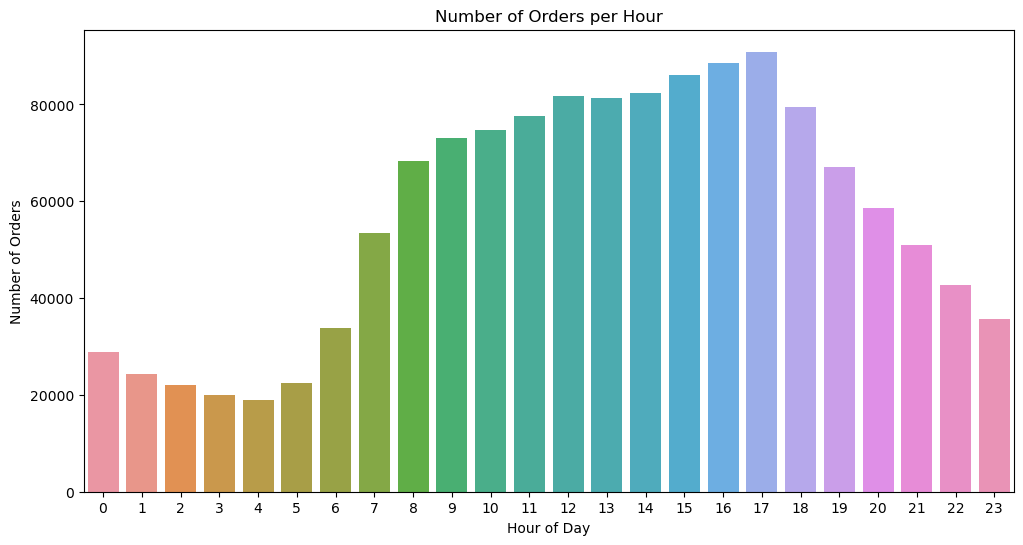

In [29]:
plt.figure(figsize=(12, 6))
sns.barplot(x=orders_per_hour.index, y=orders_per_hour.values)
plt.title('Number of Orders per Hour')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Orders')
plt.xticks(range(24))
plt.show()


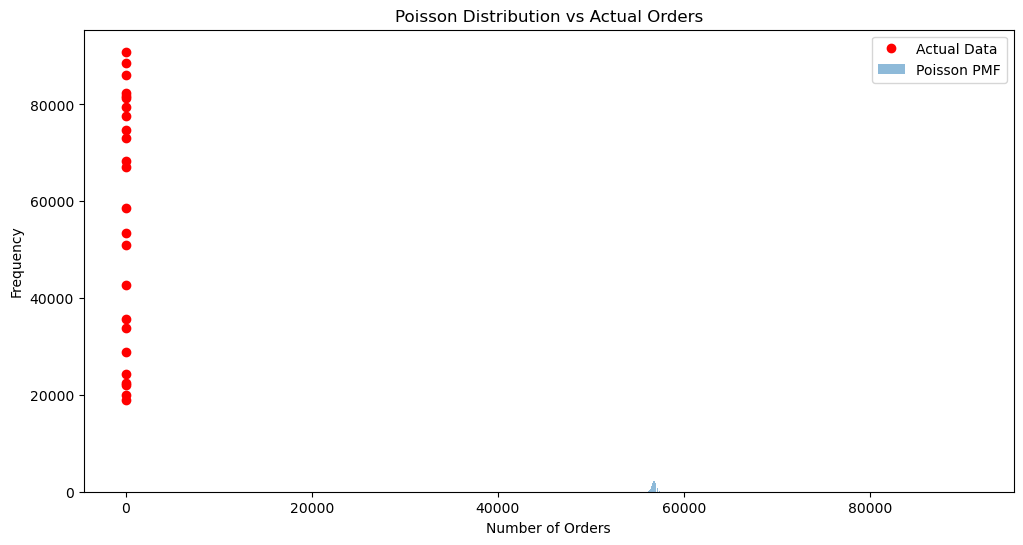

CPU times: total: 3min 14s
Wall time: 3min 55s


In [31]:
%%time
lambda_estimate = orders_per_hour.mean()  
x = np.arange(0, orders_per_hour.max() + 1)
poisson_pmf = poisson.pmf(x, lambda_estimate)

plt.figure(figsize=(12, 6))
plt.bar(x, poisson_pmf * sum(orders_per_hour), alpha=0.5, label='Poisson PMF')
plt.plot(orders_per_hour.index, orders_per_hour.values, 'ro', label='Actual Data')
plt.title('Poisson Distribution vs Actual Orders')
plt.xlabel('Number of Orders')
plt.ylabel('Frequency')
plt.legend()
plt.show()
